### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [ ]:
# Leitura dos dados
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Cálculo do faturamento
faturamento_lojas = {
    'Loja 1': loja1['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}

# Convertendo para DataFrame
df_faturamento = pd.DataFrame(list(faturamento_lojas.items()), columns=['Loja', 'Faturamento'])

df_faturamento['Faturamento (R$)'] = df_faturamento['Faturamento'].apply(
    lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)

df_faturamento

,Loja,Faturamento,Faturamento (R$)
0,Loja 1,1534509.12,"R$ 1.534.509,12"
1,Loja 2,1488459.06,"R$ 1.488.459,06"
2,Loja 3,1464025.03,"R$ 1.464.025,03"
3,Loja 4,1384497.58,"R$ 1.384.497,58"


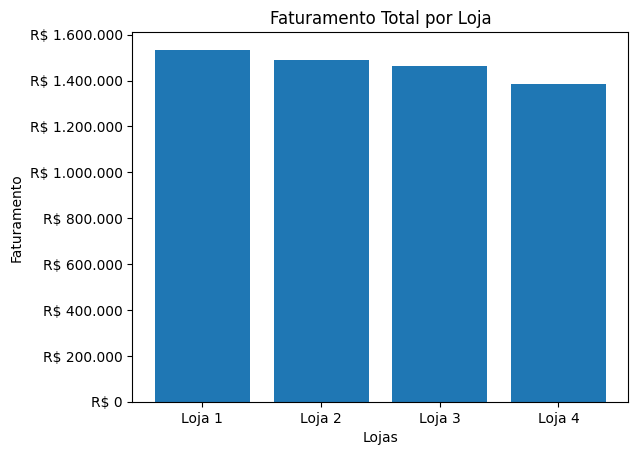

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def formato_real(valor, pos):
    return f"R$ {valor:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")

plt.figure()
plt.bar(df_faturamento['Loja'], df_faturamento['Faturamento'])
plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_real))
plt.show()

# 2. Vendas por Categoria

In [ ]:
def faturamento_por_categoria(df):
    return (
        df
        .groupby('Categoria do Produto')['Preço']
        .sum()
        .sort_values(ascending=False)
    )

fat_cat_l1 = faturamento_por_categoria(loja1)
fat_cat_l2 = faturamento_por_categoria(loja2)
fat_cat_l3 = faturamento_por_categoria(loja3)
fat_cat_l4 = faturamento_por_categoria(loja4)

def top5_faturamento_categoria(df):
    return (
        df
        .groupby('Categoria do Produto')['Preço']
        .sum()
        .sort_values(ascending=False)
        .head(5)
    )

top5_lojas = {
    'Loja 1': top5_faturamento_categoria(loja1),
    'Loja 2': top5_faturamento_categoria(loja2),
    'Loja 3': top5_faturamento_categoria(loja3),
    'Loja 4': top5_faturamento_categoria(loja4)
}

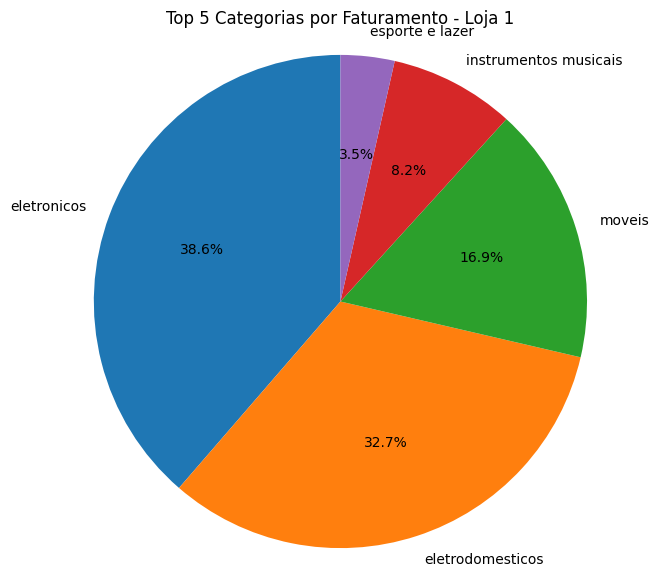

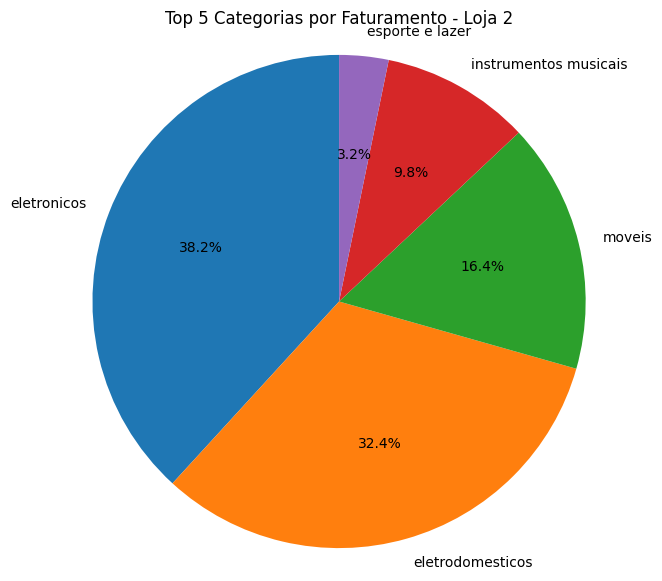

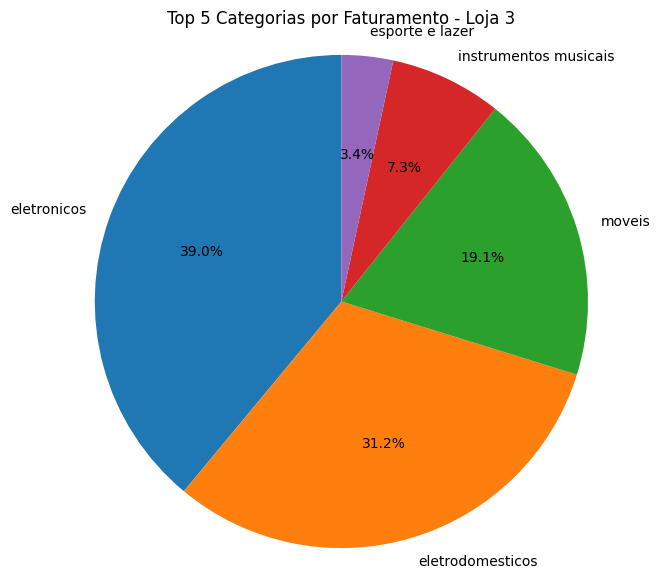

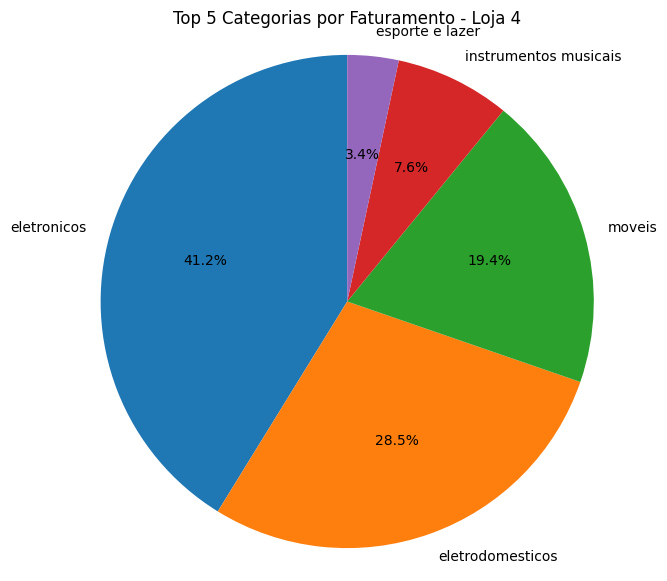

In [ ]:
import matplotlib.pyplot as plt

def autopct_reais(valores):
    def formato(pct):
        total = sum(valores)
        valor = pct * total / 100
        return f'{pct:.1f} %\n(R$ {valor:,.0f})'.replace(",", "X").replace(".", ",").replace("X", ".")
    return formato

for nome_loja, dados in top5_lojas.items():
    plt.figure(figsize=(7,7))
    plt.pie(
        dados.values,
        labels=dados.index,
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(f'Top 5 Categorias por Faturamento - {nome_loja}')
    plt.axis('equal')
    plt.show()


# 3. Média de Avaliação das Lojas


In [ ]:
# Média de avaliação de cada loja
media_avaliacao = {
    'Loja 1': loja1['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean()
}

# Convertendo para DataFrame
df_media_avaliacao = pd.DataFrame(
    media_avaliacao.items(),
    columns=['Loja', 'Avaliação Média']
)

df_media_avaliacao['Avaliação Média'] = df_media_avaliacao['Avaliação Média'].round(2)

df_media_avaliacao


,Loja,Avaliação Média
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


# 4. Produtos Mais e Menos Vendidos

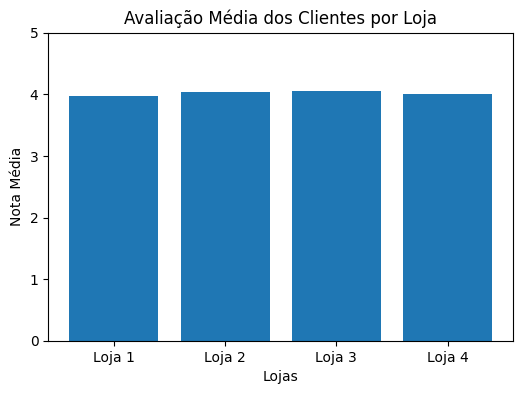

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(
    df_media_avaliacao['Loja'],
    df_media_avaliacao['Avaliação Média']
)

plt.title('Avaliação Média dos Clientes por Loja')
plt.xlabel('Lojas')
plt.ylabel('Nota Média')
plt.ylim(0, 5)
plt.show()


In [ ]:
pior_avaliacao = df_media_avaliacao.loc[
    df_media_avaliacao['Avaliação Média'].idxmin()
]

pior_avaliacao


,0
Loja,Loja 1
Avaliação Média,3.98


In [ ]:
melhor_avaliacao = df_media_avaliacao.loc[
    df_media_avaliacao['Avaliação Média'].idxmax()
]

melhor_avaliacao

,2
Loja,Loja 3
Avaliação Média,4.05


# 5. Frete Médio por Loja

In [ ]:
# Frete médio por loja
frete_medio = {
    'Loja 1': loja1['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Convertendo para DataFrame
df_frete_medio = pd.DataFrame(
    frete_medio.items(),
    columns=['Loja', 'Frete Médio']
)

# Arredondando para 2 casas decimais
df_frete_medio['Frete Médio'] = df_frete_medio['Frete Médio'].round(2)

df_frete_medio


,Loja,Frete Médio
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


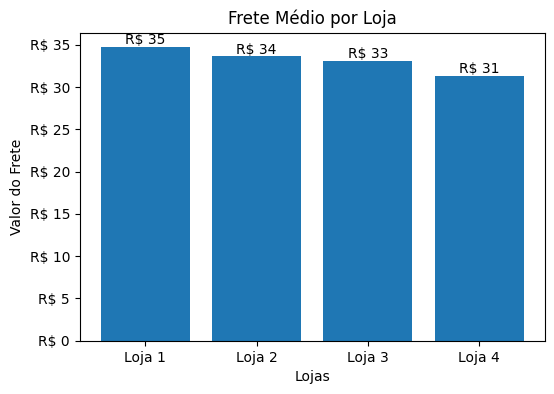

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

def formato_real(valor, pos):
    return f"R$ {valor:,.0f}".replace(",", "X").replace(".", ",").replace("X", ".")

# URLs dos dados
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Leitura dos dados para cada loja
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Frete médio por loja (Moved from cell S2JeaCykZNy9)
frete_medio = {
    'Loja 1': loja1['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Convertendo para DataFrame
df_frete_medio = pd.DataFrame(
    frete_medio.items(),
    columns=['Loja', 'Frete Médio']
)

# Arredondando para 2 casas decimais
df_frete_medio['Frete Médio'] = df_frete_medio['Frete Médio'].round(2)

fig, ax = plt.subplots(figsize=(6,4))
barras = ax.bar(
    df_frete_medio['Loja'],
    df_frete_medio['Frete Médio']
)

ax.set_title('Frete Médio por Loja')
ax.set_xlabel('Lojas')
ax.set_ylabel('Valor do Frete')
ax.yaxis.set_major_formatter(FuncFormatter(formato_real))

for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura,
        formato_real(altura, None),
        ha='center',
        va='bottom'
    )

plt.show()

In [7]:
## Análise de Desempenho das Lojas — Alura Store

# Este projeto tem como objetivo auxiliar o Senhor João, proprietário da rede Alura Store, na tomada de decisão sobre qual loja vender para iniciar um novo empreendimento.

# A decisão foi baseada na análise de dados de vendas, faturamento, avaliações dos clientes e custos de frete, utilizando Python, Pandas e Matplotlib.

# Análises Realizadas

##Faturamento Total por Loja

# Foi calculado o faturamento total de cada loja a partir da soma do valor dos produtos vendidos.

# Resultado da análise:

# As Lojas 1 e 2 apresentaram os maiores faturamentos.

# A Loja 3 teve desempenho intermediário.

# A Loja 4 apresentou o menor faturamento, indicando menor retorno financeiro em comparação às demais.

# Esse indicador é fundamental, pois demonstra diretamente a capacidade de geração de receita de cada unidade.

## Faturamento por Categoria

# A análise do faturamento por categoria revelou quais tipos de produtos mais contribuem para a receita de cada loja.

# Foram identificadas as 5 categorias mais relevantes (Top 5) para cada loja.

# Observou-se que a Loja 4 possui menor concentração de faturamento em categorias estratégicas, além de menor diversificação de produtos com alto valor agregado.

# Esse comportamento sugere menor atratividade comercial e menor potencial de crescimento.

## Avaliação Média dos Clientes

# A satisfação dos clientes foi analisada por meio da média das avaliações.

# Resultado da análise:

# As Lojas 1 e 2 apresentam as melhores avaliações médias.

# A Loja 3 mantém uma avaliação aceitável.

# A Loja 4 possui a menor avaliação média, indicando uma experiência menos satisfatória para os clientes.

# Avaliações mais baixas podem impactar diretamente a fidelização e a reputação da loja.

## Frete Médio por Loja

# O custo médio de frete foi analisado por ser um fator decisivo na experiência do consumidor.

## Resultado da análise:

# A Loja 4 apresenta um dos fretes médios mais elevados entre as unidades.

# Fretes mais altos tendem a reduzir a competitividade e podem afastar potenciais compradores.

# Esse fator reforça o desempenho inferior da Loja 4 em relação às demais.

## Visualizações

# Foram utilizados diferentes tipos de gráficos para facilitar a interpretação dos dados:

# Gráficos de barras para comparação de faturamento, avaliações e frete médio.

# Gráficos de pizza para análise do faturamento por categoria (Top 5).

# Essas visualizações permitiram uma análise clara e objetiva dos indicadores-chave de desempenho.

## Conclusão e Recomendação Final

# Com base nas análises realizadas, conclui-se que a Loja 4 apresenta o pior desempenho geral entre as unidades da Alura Store.

# Ela se destaca negativamente nos principais indicadores analisados:

# Menor faturamento total

# Avaliação média inferior

# Frete médio elevado

# Menor relevância de categorias estratégicas

## Recomendação: Recomenda-se que o Senhor João venda a Loja 4 para viabilizar seu novo empreendimento, pois essa unidade demonstra menor eficiência operacional e menor potencial de retorno financeiro quando comparada às demais lojas da rede.

# Essa decisão é sustentada por dados objetivos e análises consistentes, garantindo maior segurança estratégica para o próximo passo do negócio.
